In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing

In [2]:
fraudcheck = pd.read_csv("C:\\Users\\siddh\\Downloads\\Fraud_Check.csv")
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraudcheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# We can see that there are no Null-Values in the Data Set

In [5]:
fraudcheck.shape

(600, 6)

In [6]:
fraudcheck.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fraudcheck.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
Duplicate = fraudcheck.duplicated()
print('Duplicate rows: %d' % Duplicate.sum())

Duplicate rows: 0


In [9]:
# There are no Duplicate Rows in the Data

{'whiskers': [<matplotlib.lines.Line2D at 0x1b294b13580>,
 'caps': [<matplotlib.lines.Line2D at 0x1b294b13c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b294b13220>],
 'medians': [<matplotlib.lines.Line2D at 0x1b294b23340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b294b236a0>],
 'means': []}

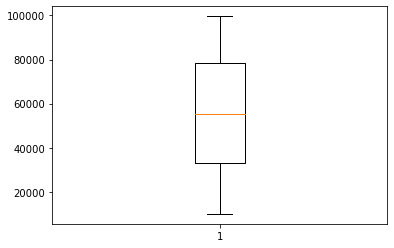

In [10]:
# BOX-PLOT; to check for Outliers
plt.boxplot(fraudcheck['Taxable.Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b294e3b280>,
 'caps': [<matplotlib.lines.Line2D at 0x1b294e3b940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b294e2cfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b294e3bf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b294e4a2e0>],
 'means': []}

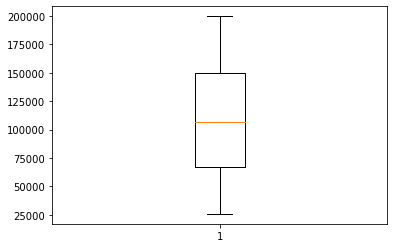

In [11]:
plt.boxplot(fraudcheck['City.Population'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b294e9daf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b294eab1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b294e9d790>],
 'medians': [<matplotlib.lines.Line2D at 0x1b294eab8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b294eabc10>],
 'means': []}

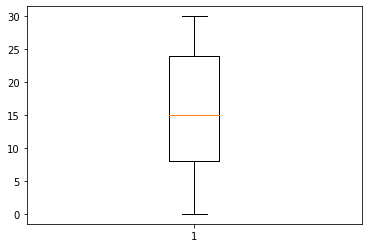

In [12]:
plt.boxplot(fraudcheck['Work.Experience'])

In [13]:
#OBJECTIVE: to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [14]:
fraudcheck[fraudcheck['Taxable.Income']<=30000].value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
YES        Single          27394           132859           18               YES      1
NO         Single          20109           39360            10               NO       1
           Married         24370           81593            14               YES      1
                           25062           114823           11               NO       1
                           27143           128996           3                YES      1
                                                                                     ..
YES        Married         19060           145744           9                YES      1
                           20391           86648            16               YES      1
                           20719           103614           24               NO       1
                           21016           140762           26               NO       1
NO         Divorced        10329     

In [15]:
#From the above we can see that there are 124 observation with <=30000

In [16]:
fraudcheck[fraudcheck['Taxable.Income']>30000].value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
YES        Single          99619           86896            29               NO       1
NO         Single          35922           77719            28               NO       1
           Married         98334           74052            30               NO       1
                           98416           31156            13               YES      1
           Single          31629           53848            10               NO       1
                                                                                     ..
YES        Married         39114           125987           3                YES      1
                           39444           148821           6                NO       1
                           39476           57194            25               NO       1
                           39818           148068           13               NO       1
NO         Divorced        31409     

In [17]:
#From the above we can see that there are 476 observation with >30000

In [18]:
# Minimum value in the variable: "taxable.Income"
fraudcheck['Taxable.Income'].min()

10003

In [19]:
# Maximum value in the variable: "taxable.Income"
fraudcheck['Taxable.Income'].max()

99619

In [20]:
# From the above we see that that the min & max value for the variable 'Taxable Income' are 10003 & 99619 respectively.
# Now we'll have to arrange the Variable into two <=30000 @ >30000.
# We'll use Cut function in order to achieve that

In [21]:
fraudcheck["Taxable.Income"] = pd.cut(fraudcheck["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [22]:
# Conversion of categorical data
def DataFrameImputer(data):
    for col in data.columns:
        if data[col].dtype=='O':
            print(data[col])

DataFrameImputer(fraudcheck)

0       NO
1      YES
2       NO
3      YES
4       NO
      ... 
595    YES
596    YES
597     NO
598    YES
599     NO
Name: Undergrad, Length: 600, dtype: object
0        Single
1      Divorced
2       Married
3        Single
4       Married
         ...   
595    Divorced
596    Divorced
597    Divorced
598     Married
599    Divorced
Name: Marital.Status, Length: 600, dtype: object
0      YES
1      YES
2      YES
3      YES
4       NO
      ... 
595    YES
596    YES
597    YES
598     NO
599     NO
Name: Urban, Length: 600, dtype: object


In [23]:
# In the above we can see that all are categorical

In [27]:
fraudcheck['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [28]:
fraudcheck['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [29]:
fraudcheck['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [30]:
fraudcheck['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [31]:
fraudcheck=pd.get_dummies(fraudcheck,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [33]:
# Using Label Encoding for "Taxable.Income"
label_encoder = preprocessing.LabelEncoder()
fraudcheck['Taxable.Income']= label_encoder.fit_transform(fraudcheck['Taxable.Income']) 
fraudcheck.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0,50047,10,0,0,1,1
1,0,134075,18,1,0,0,1
2,0,160205,30,0,1,0,1
3,0,193264,15,1,0,1,1
4,0,27533,28,0,1,0,0


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

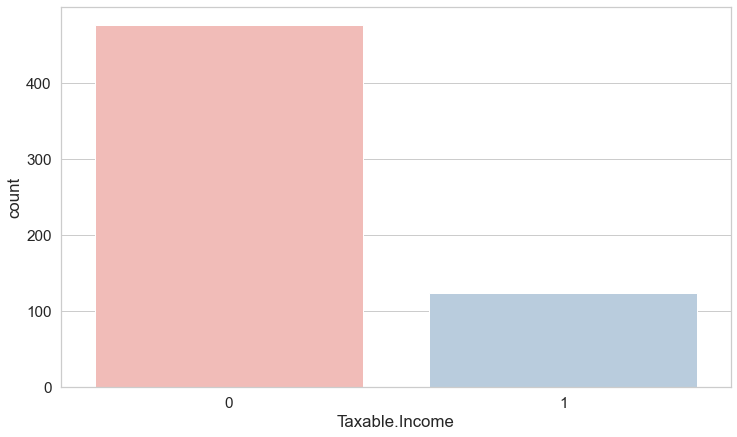

In [35]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Taxable.Income', data = fraudcheck, palette = 'Pastel1')

In [36]:
# In the above table "0" indicates >30000 Taxable Income & "1" indicates <=30000 Taxable Income.
# We observe that people with Taxable Income >30000 is more as compared to <=30000.
# Clearly we can state that it's an imbalanced Data set.

In [37]:
X = fraudcheck.drop('Taxable.Income',axis=1)
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [38]:
Y = fraudcheck['Taxable.Income']
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [39]:
# Splitting the Data into Train and Test
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=30)

In [40]:
X_train.shape

(480, 6)

In [41]:
X_test.shape

(120, 6)

In [44]:
Y_train.shape

(480,)

In [45]:
Y_test.shape

(120,)

# DECISION TREE MODEL USING ENTROPY

In [48]:
model_en_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_en_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [49]:
preds_train_dt_en = model_en_dt.predict(X_train) # Train Data Set Prediction
pd.Series(preds_train_dt_en).value_counts()

0    479
1      1
dtype: int64

In [50]:
pd.crosstab(Y_train,preds_train_dt_en) 

col_0,0,1
Taxable.Income,,
0,384,0
1,95,1


In [51]:
preds_test_dt_en  = model_en_dt.predict(X_test)  # Test Data Set Prediction
pd.Series(preds_test_dt_en).value_counts()  

0    119
1      1
dtype: int64

In [52]:
pd.crosstab(Y_test,preds_test_dt_en) 

col_0,0,1
Taxable.Income,,
0,91,1
1,28,0


In [53]:
# Test and Train accuracy
accuracy = accuracy_score(Y_test,preds_test_dt_en)
print(accuracy)

0.7583333333333333


In [54]:
accuracy = accuracy_score(Y_train,preds_train_dt_en)
print(accuracy)

0.8020833333333334


In [56]:
print(classification_report(Y_test,preds_test_dt_en))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



In [57]:
# The above concludes that it's a biased model
# It's unable to predict taxable income <=30000, cirrectly

# Synthetic Minority Oversampling Technique {SMOTE}
## SMOTE

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE(sampling_strategy = 'not majority', random_state = 42)

# OVER-SAMPLING

In [60]:
x_resample, y_resample = sm.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [61]:
y_df.value_counts()

Taxable.Income
1                 476
0                 476
dtype: int64

In [62]:
# After Resampling we can see that the values for Risky and Good, both has come down to equal i.e., 476

In [63]:
x_resample

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
947,131067,16,0,0,0,1
948,102459,18,0,0,1,0
949,124986,18,0,0,1,1
950,91873,15,0,0,0,0


In [65]:
y_resample

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    1
950    1
951    1
Name: Taxable.Income, Length: 952, dtype: int32

In [66]:
# Train and Test Data
X_train, X_test,Y_train,Y_test = train_test_split(x_resample,y_resample, test_size=0.2,random_state=30)

In [67]:
# Using Min-Max Scaler function to Normalize the data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [68]:
X_train_norm

array([[0.28936373, 0.1       , 0.        , 0.        , 1.        ,
        0.        ],
       [0.59417008, 0.36666667, 1.        , 1.        , 0.        ,
        0.        ],
       [0.11766734, 0.63333333, 0.        , 1.        , 0.        ,
        0.        ],
       ...,
       [0.64855545, 0.23333333, 0.        , 0.        , 0.        ,
        0.        ],
       [0.62877373, 0.43333333, 1.        , 0.        , 1.        ,
        0.        ],
       [0.29401893, 0.46666667, 1.        , 0.        , 0.        ,
        1.        ]])

In [69]:
print(X_train_norm.shape)

(761, 6)


In [70]:
X_test_norm

array([[0.28627176, 0.46666667, 1.        , 0.        , 0.        ,
        1.        ],
       [0.92015471, 0.13333333, 1.        , 0.        , 0.        ,
        0.        ],
       [0.06473026, 0.56666667, 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.92218921, 0.83333333, 1.        , 0.        , 1.        ,
        1.        ],
       [0.64277956, 0.06666667, 0.        , 0.        , 1.        ,
        1.        ],
       [0.17205846, 0.83333333, 0.        , 1.        , 0.        ,
        1.        ]])

In [71]:
print(X_test_norm.shape)

(191, 6)


In [72]:
Y_train

803    1
76     0
411    0
618    1
237    1
      ..
500    0
813    1
941    1
421    0
805    1
Name: Taxable.Income, Length: 761, dtype: int32

In [73]:
Y_test

745    1
704    1
749    1
521    0
310    0
      ..
61     1
644    1
209    0
585    0
224    0
Name: Taxable.Income, Length: 191, dtype: int32

# Building Decision Tree Model on Balanced Data

In [74]:
model_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [75]:
# Prediction on Train Data
preds_train_dt = model_dt.predict(X_train_norm) 
pd.Series(preds_train_dt).value_counts()

1    432
0    329
dtype: int64

In [76]:
# Prediction on Test Data
preds_test_dt  = model_dt.predict(X_test_norm) 
pd.Series(preds_test_dt).value_counts()

1    100
0     91
dtype: int64

In [77]:
# Test Accuracy
accuracy = accuracy_score(Y_test,preds_test_dt)
print(accuracy)

0.6387434554973822


In [78]:
# Train Accuracy
accuracy = accuracy_score(Y_train,preds_train_dt)
print(accuracy)

0.6727989487516426


In [79]:
print(classification_report(Y_test,preds_test_dt))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63        98
           1       0.62      0.67      0.64        93

    accuracy                           0.64       191
   macro avg       0.64      0.64      0.64       191
weighted avg       0.64      0.64      0.64       191



In [81]:
# After oversampling precision, recall and f1 score seems fair
# After oversampling the accuracy has reduced

# RANDOM FOREST

In [82]:
from sklearn.ensemble import RandomForestClassifier
forest_new = RandomForestClassifier(n_estimators=140,max_depth=5,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(X_train_norm, Y_train)

RandomForestClassifier(max_depth=5, min_samples_split=20, n_estimators=140)

In [83]:
# Prediction on Train Data
pred_rf_train = forest_new.predict(X_train_norm) # predicting on train data set 
pd.Series(pred_rf_train).value_counts()

1    394
0    367
dtype: int64

In [84]:
# Prediction on test Data
pred_rf_test  = forest_new.predict(X_test_norm) 
pd.Series(pred_rf_test).value_counts()

0    102
1     89
dtype: int64

In [85]:
# Test-Accuracy
accuracy = accuracy_score(Y_test,pred_rf_test)
print(accuracy)

0.6649214659685864


In [86]:
# Train-Accuracy
accuracy = accuracy_score(Y_train,pred_rf_train)
print(accuracy)

0.7437582128777924


In [87]:
print(classification_report(Y_test,pred_rf_test))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        98
           1       0.66      0.63      0.65        93

    accuracy                           0.66       191
   macro avg       0.66      0.66      0.66       191
weighted avg       0.66      0.66      0.66       191



In [88]:
# Accuracy has been reduced

# eXtreme Gradient Boosting (XGBoost)

# Using XGBoost

In [92]:
from xgboost import XGBClassifier

In [94]:
xgb_model = XGBClassifier(max_depth=4,n_estimators=200)
xgb_model.fit(X_train_norm, Y_train)
y_pred_xgb = xgb_model.predict(X_test_norm)
accuracy = accuracy_score(Y_test,y_pred_xgb)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 76.96%


In [95]:
print(classification_report(Y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        98
           1       0.77      0.75      0.76        93

    accuracy                           0.77       191
   macro avg       0.77      0.77      0.77       191
weighted avg       0.77      0.77      0.77       191

